# Indicators Refactoring

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
import pandas as pd
import sys

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

import tensorflow as tf

%load_ext lab_black

sys.path.append("/Users/renero/Documents/SideProjects/trader/src/")
sys.path.append("/Users/renero/Documents/SideProjects/trader/src/predictor")

from dictionary import Dictionary
from indicators.trend import trend
from indicators.l1tf import l1tf
from predictor.lstm import lstm
from predictor.sequences import sequences
from predictor.ticks import Ticks
from predictor.metrics import metrics

In [2]:
argv = [
    "",
    "-c",
    "../params/params.eurusd.yaml",
    "-f",
    "../data/EURUSD/EURUSD_2018_2020.csv",
    "--window",
    "8",
    "--epochs",
    "400",
    "train",
]
params = Dictionary(args=argv)

2020-11-12 18:08:56 - INFO  - Dictionary:__init__               - Using configuration parameters from: ../params/params.eurusd.yaml


In [3]:
ticks = Ticks(params, params.input_file).scale()
ticks.append_indicator(["trend", "median_filter", "l1tf"])
ticks.data.head()

,open,high,low,close,close_trend,med_filter,close_l1tf
Datetime,,,,,,,
2018-01-01,1.2274,1.1598,1.2794,1.2442,1.0,1.2423,1.287740
2018-01-02,1.2292,1.2731,1.2922,1.3358,1.0,1.2442,1.278761
2018-01-03,1.3218,1.2430,1.2794,1.2423,0.0,1.2753,1.269782
2018-01-04,1.2292,1.2873,1.2849,1.3449,1.0,1.2918,1.260803
2018-01-05,1.3309,1.2767,1.3160,1.2753,0.0,1.2753,1.251824


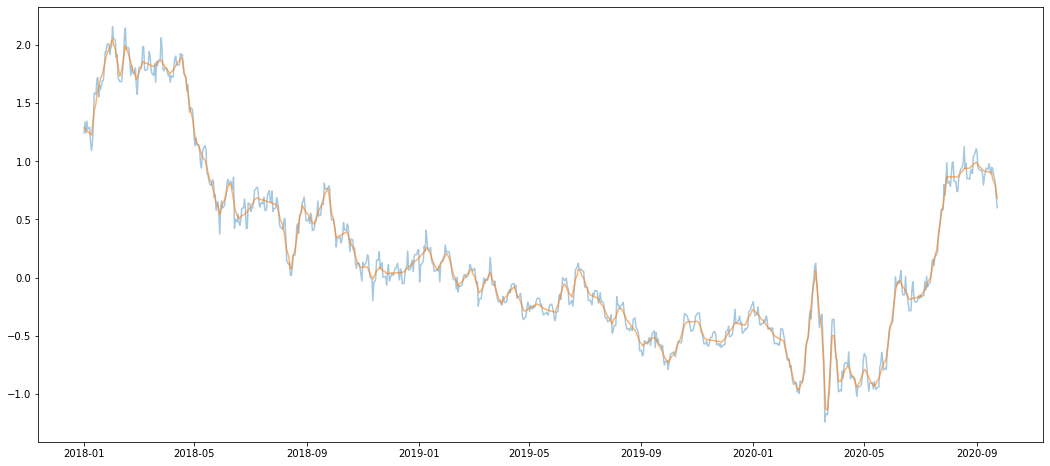

In [6]:
plt.figure(figsize=(18, 8))
plt.plot(ticks.data.close, alpha=0.4)
plt.plot(ticks.data.close_l1tf, alpha=0.6)
plt.show()